In [1]:
import numpy as np
import pandas as pd

**Impoting Dataset**

In [3]:
data = pd.read_csv('heart (2).csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.size

14350

In [6]:
data.shape

(1025, 14)

**Fixing Null and Duplicate Values**

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.duplicated().sum()

723

In [10]:
data_dup = data.duplicated().any()

In [11]:
data_dup

True

In [12]:
data = data.drop_duplicates()

In [13]:
data_dup = data.duplicated().any()

In [14]:
data_dup

False

**Data Preprocessing**

In [16]:
categorial_value = []
numerical_value = []

for column in data.columns:
    if data[column].nunique()<=10:
        categorial_value.append(column)
    else:
        numerical_value.append(column)

In [17]:
categorial_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
numerical_value

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Encoding Categorial Data**

In [20]:
categorial_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
data['cp']

0      0
1      0
2      0
3      0
4      0
      ..
723    2
733    2
739    0
843    3
878    0
Name: cp, Length: 302, dtype: int64

In [22]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [23]:
categorial_value.remove('sex')
categorial_value.remove('target')

data = pd.get_dummies(data , columns=categorial_value, drop_first= True)

In [24]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**Feature Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
st = StandardScaler()
data[numerical_value] = st.fit_transform(data[numerical_value])

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False



**Training and Testing**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = data.drop('target', axis=1)
y = data['target']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
y_test


245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

**Logistic Regression**

In [35]:
data.head(3)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred = log.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.7868852459016393

**SVC**

In [42]:
from sklearn import svm

In [43]:
svm = svm.SVC()

In [44]:
svm.fit(x_train,y_train)

SVC()

In [45]:
y_pred2 = svm.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

**KNeighbors Classifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred3 = knn.predict(x_test)

In [52]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [53]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [54]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [55]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

**Non Linear ML Algorithms**

In [57]:
#In non linear ml algo we dont need encoding

In [58]:
data = pd.read_csv('heart (2).csv')

In [59]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [60]:
data = data.drop_duplicates()

In [61]:
data.shape

(302, 14)

In [62]:
x = data.drop('target', axis=1)
y = data['target']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**Decision Tree Classifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred4 = dt.predict(x_test)

In [69]:
accuracy_score(y_test, y_pred4)

0.7213114754098361

**Random Forest Classifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
y_pred5 = rf.predict(x_test)

In [75]:
accuracy_score(y_test, y_pred5)

0.8524590163934426

 **Gradient Boosting Classifier**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc = GradientBoostingClassifier()

In [79]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [80]:
y_pred6 = gbc.predict(x_test)

In [81]:
accuracy_score(y_test, y_pred6)

0.819672131147541

**Best Model**

In [83]:
final_data = pd.DataFrame({
    'Models': ['LR','SVM', 'KNN','DT','RF','GB'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})

In [84]:
final_data

,Models,Accuracy
0,LR,0.803279
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.852459
5,GB,0.819672


In [85]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [86]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

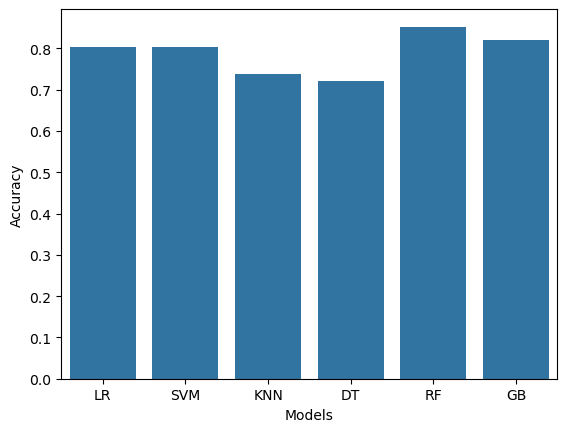

In [87]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

In [88]:
x = data.drop('target', axis=1)
y = data['target']

In [89]:
x.shape

(302, 13)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

**Prediction on new data set**

In [93]:
import pandas as pd

In [94]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak':	1.0,
    'slope':2,
    'ca':2,
    'thal':3,
}, index=[0])

In [95]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [96]:
p = rf.predict(new_data)

if p == 0:
    print("No Disease Found")
else:
    print("You are diagnosed with Heart Disease")

No Disease Found


**Save Model Using Joblib**

In [98]:
import joblib

In [99]:
joblib.dump(rf,'HeartPredictionModel')

['HeartPredictionModel']

In [100]:
model = joblib.load('HeartPredictionModel')

In [101]:
model.predict(new_data)

array([0], dtype=int64)

**GUI**

In [103]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=int(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('HeartPredictionModel')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=33)
    else:
         Label(master, text="Possibility of Heart Disease").grid(row=33)

master = Tk()
master.title("Heart Disease Prediction Model")

label = Label(master, text = "Heart Disease Prediction System", bg = "black", fg = "white").grid(row=1,columnspan=6)

Label(master, text="Enter Your Age").grid(row=4)
Label(master, text="Male Or Female [1/0]").grid(row=6)
Label(master, text="Enter value of Cp").grid(row=8)
Label(master, text="Enter value of trestbps").grid(row=10)
Label(master, text="Enter value of chol").grid(row=12)
Label(master, text="Enter value of fbs").grid(row=14)
Label(master, text="Enter value of restecg").grid(row=16)
Label(master, text="Enter value of thalach	").grid(row=18)
Label(master, text="Enter value of exang").grid(row=20)
Label(master, text="Enter value of oldpeak").grid(row=22)
Label(master, text="Enter value of slope").grid(row=24)
Label(master, text="Enter value of ca").grid(row=26)
Label(master, text="Enter value of thal").grid(row=28)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=4, column=1)
e2.grid(row=6, column=1)
e3.grid(row=8, column=1)
e4.grid(row=10, column=1)
e5.grid(row=12, column=1)
e6.grid(row=14, column=1)
e7.grid(row=16, column=1)
e8.grid(row=18, column=1)
e9.grid(row=20, column=1)
e10.grid(row=22, column=1)
e11.grid(row=24, column=1)
e12.grid(row=26, column=1)
e13.grid(row=28, column=1)

Button(master, text='Predict Test Result', command=show_entry_fields).grid()

mainloop()